<a href="https://colab.research.google.com/github/shashankbhatia15/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

**MOUNT DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**SET FILE PATH**

In [ ]:
path='/content/drive/MyDrive/AlmaBetter/M1-PYTHON/Airbnb Bookings Analysis - Shashank Bhatia/'

In [ ]:
df=pd.read_csv(path + '/Airbnb NYC 2019.csv')

Now that we have the required data, i'll take my first step to become a data scientist.
*WISH ME LUCK!!*

First let's make a copy of our data so our orignal file stays intact.

In [ ]:
df_air=df.copy()

we'll check what all rows and columns are in the file

In [ ]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Now we'll see the data types of entries and null values in our columns.

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Here we can see that there are 4 columns only with null values- *name, host_name, last_review and reviews_per_month*. We're going to do something about it. 

In [ ]:
#dropping last_review
df_air.drop(['last_review'],axis=1,inplace=True)

In [ ]:
#fill all Nan values in reviews_per_month with 0
df_air['reviews_per_month']=df.reviews_per_month.fillna(0)
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

We can fill the null values in host_name and name with something but we won't, so we can use the methods related to NaN values (isna/dropna) directly if we need to.

Next we'll inspect the numerical values in various columns

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


WAIT A MINUTE... The minimum price is zero??

As much as we do like free stuff, this is just not possible. We have an *Out-liar* here folks. there must be other values which are too good to be true, now in real world we would look at another data to figure out the how low the prices actually go in USA, but for the sake of saving our time, let's assume it's $20. 

We can see the median price is $106, so next we will change all the values below 20 with our median in *price* column.

In [ ]:
#this shows a very small percent of rooms are listed below $20, so our assumption is sutainable for this data.
len(df_air['price'][df_air['price']<=20])

87

In [ ]:
#changing all the values below 20
df_air['price'][df_air['price']<=20]=106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Let's check if our changes are now visible.

In [ ]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [ ]:
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.884303,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.090787,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,21.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


SUCCESS!!!

Now we're ready to do some analysis on our data.

# **Room types - mean price and which type is booked the most**

We're going to see which room type is the costliest one.

In [ ]:
#find mean price for each room type
price_roomtype=df_air.groupby(['room_type'])['price'].mean().reset_index()
price_roomtype

,room_type,price
0,Entire home/apt,211.868472
1,Private room,89.911269
2,Shared room,72.890517


So the Entire home/apt is the costliest, which makes sense because it is bigger than just a room, so costs more.
The second costliest is a private room, which also makes sense as the cost is distributed between people in shared rooms.

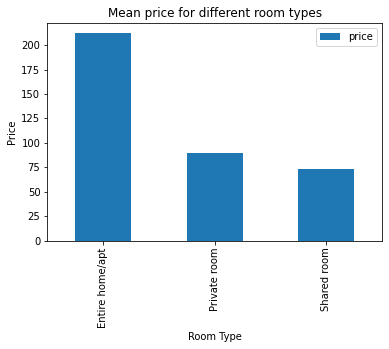

In [ ]:
price_roomtype.plot(kind='bar', x='room_type',y='price',xlabel='Room Type',ylabel='Price')
plt.title('Mean price for different room types')
plt.show()

Next we'll see which rooms are getting the most trafic. Here we are assuming that rooms which are used more will get more reviews.

In [ ]:
#find 
rt_rev=df_air.groupby('room_type')['number_of_reviews'].sum()
rt_rev

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

Here we can clearly see that entire home/apt is the one most booked, followed closely by private room and shared room is only booked by a very small number of people.

---
This tells us people mostly go on vacations with their family/friends and book an entire home to stay. For the people who travel in smaller groups value their privacy and book a private room much more than a shared room.




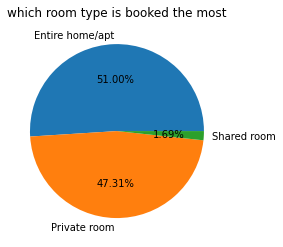

In [ ]:
rt_rev.plot(kind='pie',autopct='%1.2f%%',ylabel='',title='which room type is booked the most')

plt.show()

# **Most expensive and most visited neighbourhood group by room type**


---
We'll start with finding out which neighbourhood group is the most expensive for which room type.


In [ ]:
df_air.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,67.098160,68.400000
Brooklyn,178.397531,76.668377,54.406780
Manhattan,249.296538,116.868579,89.556250
Queens,147.269561,71.816429,72.202020
Staten Island,173.846591,62.750000,77.333333


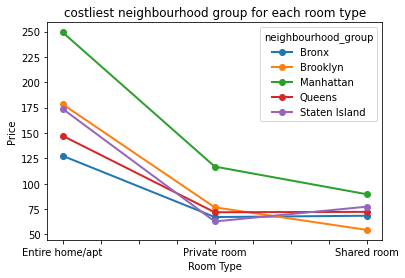

In [ ]:
price_by_nbh_g=df_air.groupby(['room_type','neighbourhood_group'])['price'].mean().unstack()
price_by_nbh_g.plot(linewidth=2,markersize=6,marker='o',xlabel='Room Type',ylabel='Price',title='costliest neighbourhood group for each room type')


We can see that Manhattan is the most expensive for all room types by a good margin. Now let's figure out which neighbourhood group  has the most bookings for each room type.

In [ ]:
df_air.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].sum().unstack()

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,11627,16312,432
Brooklyn,267128,213653,5793
Manhattan,235147,209150,10272
Queens,60644,93561,2745
Staten Island,5857,5670,14


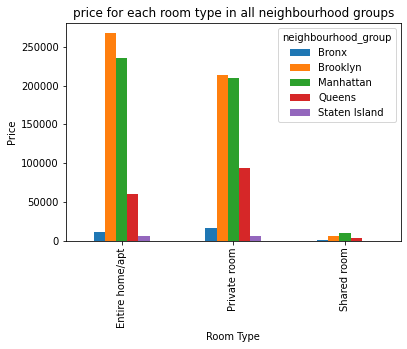

In [ ]:
nbh_g_rt_rev=df_air.groupby(['room_type','neighbourhood_group'])['number_of_reviews'].sum().unstack()
nbh_g_rt_rev.plot(kind='bar',xlabel='Room Type',ylabel='Price',title='price for each room type in all neighbourhood groups')

So Brooklyn and manhattan are the 2 most visited neighbourhood groups, which may be because of any number of reasons like climate, landscape, connectivity,etc. Manhattan is still the second most visited neighbourhood group even though it the most expensive. We can concur that Manhattan is the favourite here.

let's analyze the top two groups-

Brooklyn is leading in private rooms and appartments, the obvious reason for that is the cost difference between the two. But Manhattan is leading in shared rooms as the cost is somewhat similar.

# **MINIMUM NIGHTS-AVAILABILITY-PRICE correlation.**

Here, we will try to find out the correlation between mean minimum nights, availability and price considering all neighbourhood groups.

In [ ]:
#mean availability,minimum nights and price for each neighbourhood group
nbh_g_min_night_price_corr=df_air.groupby('neighbourhood_group')['availability_365','minimum_nights','price'].mean().reset_index()
nbh_g_min_night_price_corr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,neighbourhood_group,availability_365,minimum_nights,price
0,Bronx,165.758937,4.560953,88.154904
1,Brooklyn,100.232292,6.056556,124.580979
2,Manhattan,111.979410,8.579151,196.957527
3,Queens,144.451818,5.181433,99.741970
4,Staten Island,199.678284,4.831099,115.522788


In [ ]:
#correlation between availability,minimum nights and price
df_corr=nbh_g_min_night_price_corr.corr()
df_corr

,availability_365,minimum_nights,price
availability_365,1.000000,-0.689489,-0.527240
minimum_nights,-0.689489,1.000000,0.972553
price,-0.527240,0.972553,1.000000


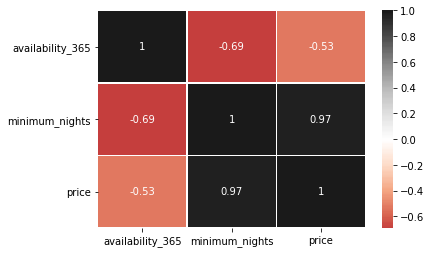

In [ ]:
sns.heatmap(df_corr,annot=True,center=0,linewidth=0.5,cmap='RdGy')

This heatmap shows us a moderate negative correlation between price and availability, which was expected as low supply and high demand means higher price.

It also a strong positive correlation between price and minimum nights, which may be due to the host having confidence in their property that people would like to stay longer and also pay accordingly.



# **Location and number of rooms in each neighbourhood group**

Since we have latitude and longitude for all our rooms, let's plot them in a graph.

[Text(0.5, 1.0, 'Location of properties in all neighbourhood groups')]

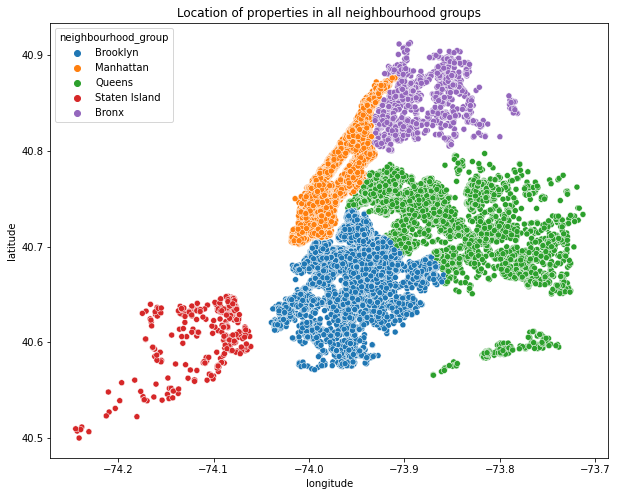

In [ ]:
#plotiing all the listings
plt.figure(figsize=(10,8))
ax=sns.scatterplot(x="longitude",y="latitude",data=df_air,hue="neighbourhood_group")
ax.set(title='Location of properties in all neighbourhood groups')

Just to understand the relative denisty of all the neighbourhood groups, we'll see just how many rooms does each group has.

In [ ]:
df2=df_air.groupby('neighbourhood_group')['id'].count().to_frame().reset_index()
df2

,neighbourhood_group,id
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


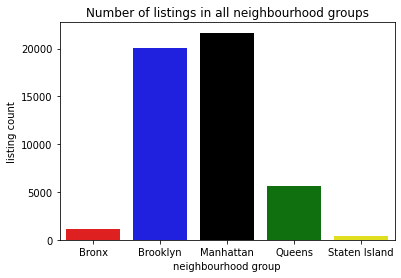

In [ ]:
#Finding number of listings in all neighbourhood groups
ax=sns.barplot(y="id",data=df2,x="neighbourhood_group",palette=['red','blue','black','green','yellow']) 
ax.set(xlabel="neighbourhood group",ylabel="listing count",title='Number of listings in all neighbourhood groups')
plt.show()

With least area and most number of properties, Manhattan is the most dense of all.

# **Most successful host**

To find the most successfull host, we have to see which host owns the most properties. More properties means more cashflow, the business was doing well when you were investing more into it.

In [ ]:
most_successful_host=df_air[df_air['calculated_host_listings_count']==df_air['calculated_host_listings_count'].max()].reset_index()

In [ ]:
most_successful_host.head(1)

,index,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,0.0,327,309


So Sonder(NYC) is the most successful host. But there must be reason for this success. 

One reason may be good marketing, but is there any data in our database that can give us any clue?

In [ ]:
most_successful_host['neighbourhood_group'].unique()

array(['Manhattan'], dtype=object)

In [ ]:
most_successful_host['room_type'].unique()

array(['Entire home/apt', 'Private room'], dtype=object)

Our data shows that Sonder(NYC) only have listings in Manhattan and only have private rooms and appartments. So they are only dealing in most expensive aspect of this business, hence making more money and increasing their number of listings.

# **Most expensive neighboorhood in their respective neighbourhood groups**

---
We'll now find out which are the most expensive neighbourhoods in their respective neighbourhood groups, but only through visual representation.
We will not print a single dataframe.


In [ ]:
#looking at all unique values
df_air.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [ ]:
#bifurcating all the groups according to their names
df_brook=df_air[df_air['neighbourhood_group']=='Brooklyn']
df_man=df_air[df_air['neighbourhood_group']=='Manhattan']
df_queens=df_air[df_air['neighbourhood_group']=='Queens']
df_si=df_air[df_air['neighbourhood_group']=='Staten Island']
df_bronx=df_air[df_air['neighbourhood_group']=='Bronx']

In [ ]:
#finding the mean price for all neighbourhoods
brook_most_exp_nbh=df_brook.groupby('neighbourhood')['price'].mean().reset_index()
man_most_exp_nbh=df_man.groupby('neighbourhood')['price'].mean().reset_index()
queens_most_exp_nbh=df_queens.groupby('neighbourhood')['price'].mean().reset_index()
si_most_exp_nbh=df_si.groupby('neighbourhood')['price'].mean().reset_index()
bronx_most_exp_nbh=df_bronx.groupby('neighbourhood')['price'].mean().reset_index()

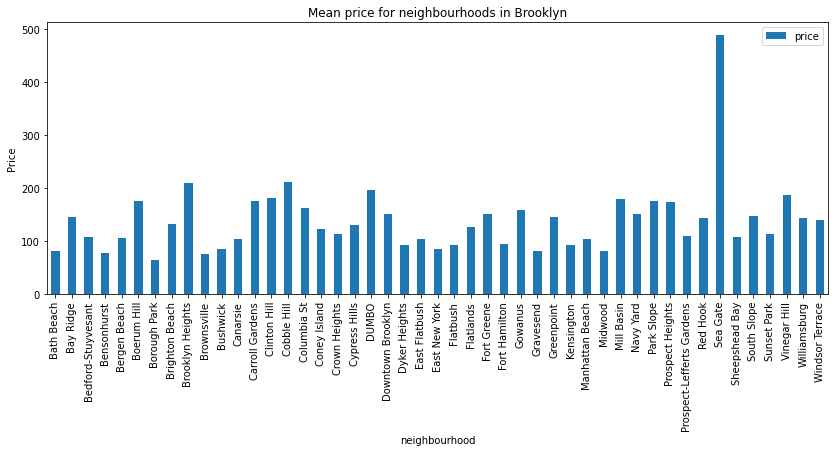

In [ ]:
#for Brooklyn
brook_most_exp_nbh.plot(x='neighbourhood',y='price',kind='bar',figsize=(14,5),ylabel='Price',title='Mean price for neighbourhoods in Brooklyn')

The most expensive neighbourhood in Brooklyn is Sea Gate.

[]

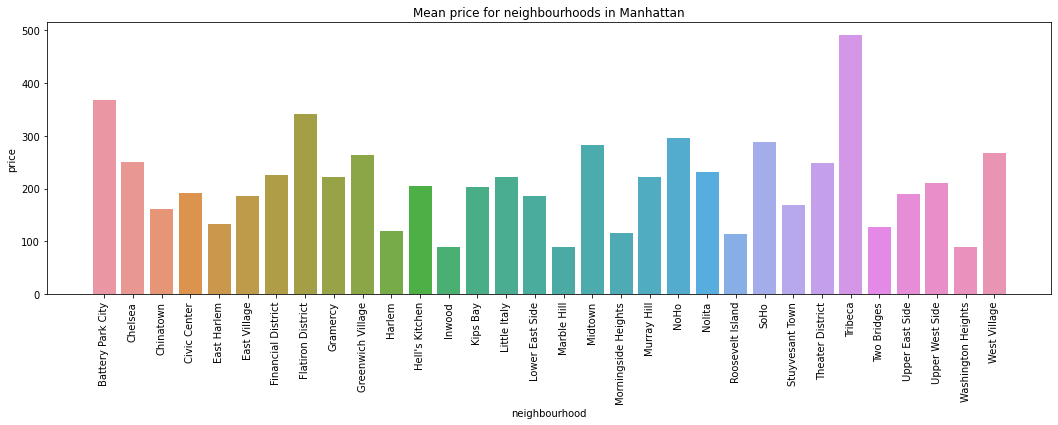

In [ ]:
plt.figure(figsize=(18,5))
z=sns.barplot(x='neighbourhood',y='price',data=man_most_exp_nbh)
plt.xticks(rotation=90)
plt.title('Mean price for neighbourhoods in Manhattan')
z.plot()

The most expensive neighbourhood in manhattan is Tribeca.

[]

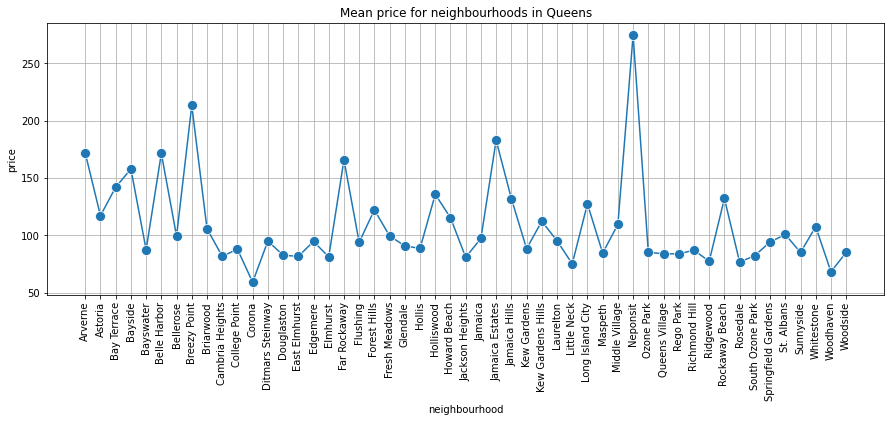

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.lineplot(x='neighbourhood',y='price',data=queens_most_exp_nbh,marker='o',markersize=10)
plt.title('Mean price for neighbourhoods in Queens')
plt.xticks(rotation=90)
plt.grid()
ax.plot()

The most expensive neighbourhood in Queens is Neponsit.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


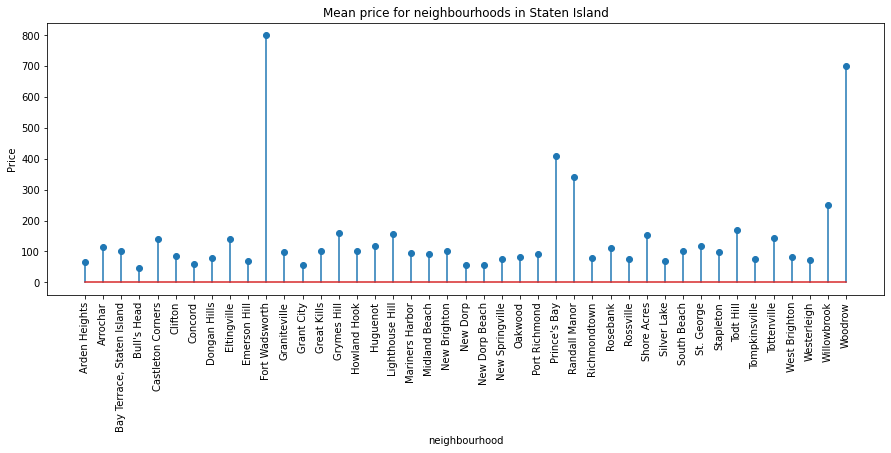

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.stem('neighbourhood','price',data=si_most_exp_nbh)
plt.xlabel('neighbourhood')
plt.ylabel('Price')
plt.title('Mean price for neighbourhoods in Staten Island')
plt.show()

The most expensive neighbourhood in Staten Island is Fort Wadsworth.

[]

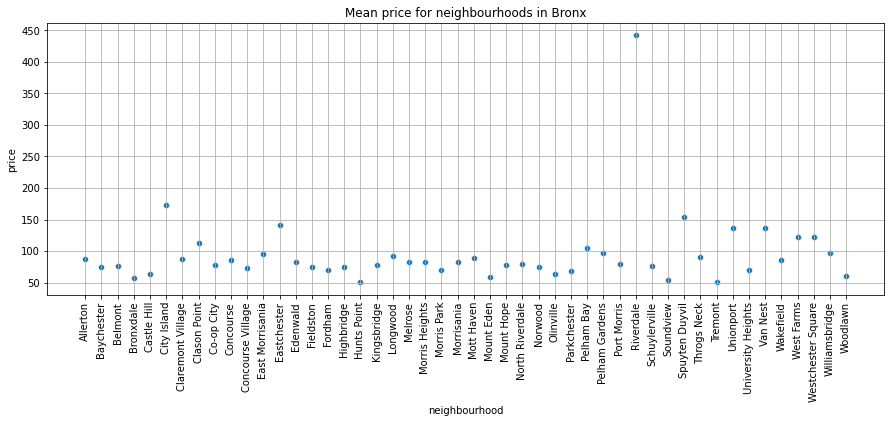

In [ ]:
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x='neighbourhood',y='price',data=bronx_most_exp_nbh)
plt.title('Mean price for neighbourhoods in Bronx')
plt.xticks(rotation=90)
plt.grid()
ax.plot()



The most expensive neighbourhood in Bronx is Riverdale.

# **CONCLUSION**

---

We are now done with our analysis and following are the findings:


1. Entire home/apt is the most expensive and yet get the most traffic.
2. Private room is second highest in terms of booking which suggests people value thier privacy.
3. Manhattan is the most expensive Neighbourhood group and Brooklyn gets the most traffic.
4. Price have a positive correlation with Minimum nights and negative correlation with availability.
5. Sonder(NYC) is the most successful host, who only caters in Manhattan and only lists appartments and private rooms.
6. Most expensive neighbourhoods- 
*   The most expensive neighbourhood in Brooklyn is Sea Gate.
*   The most expensive neighbourhood in manhattan is Tribeca.
*   The most expensive neighbourhood in Queens is Neponsit.
*   The most expensive neighbourhood in Staten Island is Fort Wadsworth.
*   The most expensive neighbourhood in Bronx is Riverdale.






